### __Домашнее задание к лекции 10 Numpy & Pandas (Olympic Medals)__

In [249]:
import pandas as pd
import matplotlib.pyplot as plt

In [250]:
df = pd.read_csv('olimpic_medals.csv')

#### __1. Сколько медалей выиграл Jesse Owens в 1936?__

In [251]:
df[(df.Athlete == 'OWENS, Jesse') & (df.Edition == 1936)].shape[0]

4

#### __2. Какая страна выиграла большинство золотых медалей мужчинами в бадминтоне?__

In [252]:
df[(df.Sport == 'Badminton') & (df.Gender == 'Men') & (df.Medal == 'Gold')].NOC.value_counts().head(1)

INA    8
Name: NOC, dtype: int64

#### __3. Какие три страны выиграли большинство медалей в последние годы (с 1984 по 2008)?__

In [253]:
df[df.Edition >= 1984].NOC.value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

#### __4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выигрыша. Покажите город в котором проходила олимпиада, год, имя атлета и страну за которую он выступал.__

In [254]:
df[(df.Event == '100m') & (df.Medal == 'Gold') & (df.Gender == 'Men')].sort_values('Edition', ascending=False)[['City', 'Edition', 'Athlete', 'NOC']]

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


#### __5. Как много медалей было выиграно мужчинами и женщинами в истории олимпиады. Как много золотых, серебряных и бронзовых медалей было выиграно каждым полом?__

In [255]:
df[['Gender', 'Medal']].groupby('Gender').agg('count')

,Medal
Gender,
Men,21721
Women,7495


In [256]:
df[['Gender', 'Medal']].groupby(['Gender', 'Medal']).agg({'Medal':'count'})

Medal
Gender Medal        
Men    Bronze   7175
       Gold     7365
       Silver   7181
Women  Bronze   2514
       Gold     2485
       Silver   2496

#### __6. Используя groupby(), постройте график числа всех медалей выигранных на каждой олимпиаде.__

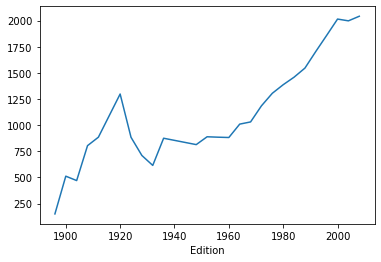

In [257]:
df.groupby('Edition')['Medal'].count().plot()

#### __7. Создайте список показывающий число всех медалей выигранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.__

In [258]:
df.groupby('NOC').agg({'Medal': 'count', 'Edition': ['min', 'max']})

Medal Edition      
    count     min   max
NOC                    
AFG     1    2008  2008
AHO     1    1988  1988
ALG    14    1984  2008
ANZ    29    1908  1912
ARG   239    1924  2008
..    ...     ...   ...
VIE     2    2000  2008
YUG   435    1924  2000
ZAM     2    1984  1996
ZIM    23    1980  2008
ZZX    48    1896  1904

[138 rows x 3 columns]

#### __8. Атлеты выигравшие медали в Beijing на дистанции 100m или 200m__

In [259]:
df[(df.City == 'Beijing') & ((df.Event == '100m') | (df.Event == '200m'))]['Athlete'].drop_duplicates()

27551                 DIX, Walter
27552                 BOLT, Usain
27553           THOMPSON, Richard
27554          FRASER, Shelly-ann
27555            SIMPSON, Sherone
27556             STEWART, Kerron
27571             CRAWFORD, Shawn
27573    CAMPBELL-BROWN, Veronica
27574              FELIX, Allyson
Name: Athlete, dtype: object

#### __9. Постройте график числа золотых медалей выигранных США мужчинами и женщинами в атлетике.__

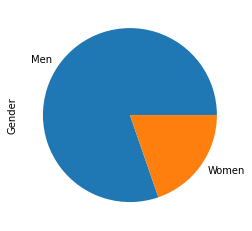

In [260]:
df[(df.Medal == 'Gold') & (df.NOC == 'USA') & (df.Sport == 'Athletics')].Gender.value_counts().plot.pie()

#### __10.Постройте график 5 атлетов которые выиграли большинство золотых медалей.__

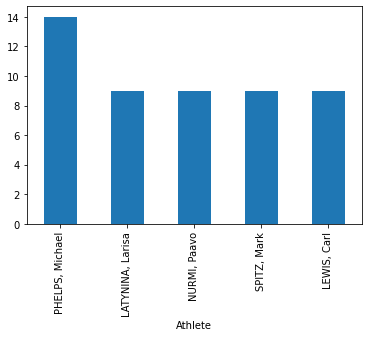

In [267]:
df[df.Medal == 'Gold'].groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(5).plot.bar()

#### __11. Покажите суммарное количество медалей выигранных странами в последних олимпийских играх.__

In [262]:
df[df.Edition == df.Edition.max()].NOC.value_counts()

USA    315
CHN    184
AUS    149
RUS    143
GER    101
      ... 
EGY      1
ECU      1
CHI      1
VEN      1
MDA      1
Name: NOC, Length: 86, dtype: int64

#### __12. Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.__

In [263]:
df[df.NOC == 'USA'].groupby(['Edition', 'Athlete', 'Sport'])['Athlete'].count().sort_values(ascending=False).groupby(level=0).head(1).sort_index()

Edition  Athlete                      Sport     
1896     GARRETT, Robert              Athletics     4
1900     BAXTER, Irving               Athletics     5
1904     EYSER, George                Gymnastics    6
1908     SHEPPARD, Melvin             Athletics     3
1912     OSBURN, Carl Townsend        Shooting      4
1920     LEE, Willis                  Shooting      7
1924     WEISSMULLER, Johnny          Aquatics      4
1928     LAUFER, Walter               Aquatics      2
1932     DIDRIKSON, Mildred           Athletics     3
1936     OWENS, Jesse                 Athletics     4
1948     CURTIS, Ann Elisabeth        Aquatics      3
1952     KONNO, Ford Hiroshi          Aquatics      3
1956     BREEN, George Thomas         Aquatics      3
1960     VON SALTZA, Susan Christina  Aquatics      4
1964     ELLIS, Kathleen              Aquatics      4
1968     HICKCOX, Charles Buchanan    Aquatics      4
1972     SPITZ, Mark                  Aquatics      7
1976     NABER, John Phillips    